In [3]:
import pandas as pd
import re
import ast

In [4]:
llava_path = 'outputs/test_data_openai.csv'
llava_df = pd.read_csv(llava_path)

llava_df.head(3)

,filename,question,options,answer,category,id,openai_response,openai_response_parsed,score
0,CHITTRON_7834.png,চিত্রের শিশুটি কোন ধরনের শিক্ষা গ্রহণ করছে?,"['চারুকলা', 'গান', 'একাডেমিক', 'নৃত্য']",নৃত্য,Arts & History,F3CH7834,answer: 4,নৃত্য,1
1,CHITTRON_3642.png,বাংলার মর্মান্তিক ইতিহাস বহনকারী এই স্তম্ভটির ...,"['স্মৃতিসৌধ', 'শহীদ মিনার', 'রাজু ভাস্কর্য', '...",শহীদ মিনার,Arts & History,P9CH3642,answer: 2,শহীদ মিনার,1
2,BORNON_215.jpg,ছবিতে দেখা মুদ্রাটি কোন দেশের?,"['বাংলাদেশ', 'শ্রীলঙ্কা', 'ভারত', 'পাকিস্তান']",বাংলাদেশ,Arts & History,P5BO215,answer: 1,বাংলাদেশ,1


In [4]:
# llava_df.isna().sum() #BNATURE_1727

### operations, parsing

In [29]:
def extract_number(strings):
    for s in strings:
        match = re.search(r'\d+', s)  
        if match:
            return int(match.group())  
    return -1 

In [30]:
def advanced_extract_number(strings):
    if strings == -1:
        return -1
    for s in strings:
        match = re.search(r'(answer:\s*\d+)', s, re.IGNORECASE)  # Prioritize "answer: <number>"
        if match:
            return int(match.group(1))  # Return the captured number

    for s in strings:
        match = re.search(r'\d+', s)  # Fallback: Capture the first number
        if match:
            return int(match.group())  

    return -1

In [31]:
def translated_extract(strings):   
    pattern = r'(answer:\s*\d+)'
    match = re.search(pattern=pattern, string=strings)
    if match:   
        return match[0].strip()
    else:
        return -1

In [53]:
# (translated_extract(test_string))

In [54]:
# pf = llava_df[['filename'] == 'BORNON_3864.jpg']
# str(llava_df[llava_df['filename'] == 'BORNON_3864.jpg']['llava_answer'])
# llava_df['gemini_generated_large_parsed'] = llava_df['gemini_generated_large'].apply(translated_extract)
llava_df['openai_response_parsed'] = llava_df['openai_response'].apply(extract_number)

In [55]:
llava_df.head(3)

,filename,question,options,answer,category,id,openai_response,openai_response_parsed
0,CHITTRON_7834.png,চিত্রের শিশুটি কোন ধরনের শিক্ষা গ্রহণ করছে?,"['চারুকলা', 'গান', 'একাডেমিক', 'নৃত্য']",নৃত্য,Arts & History,F3CH7834,answer: 4,4
1,CHITTRON_3642.png,বাংলার মর্মান্তিক ইতিহাস বহনকারী এই স্তম্ভটির ...,"['স্মৃতিসৌধ', 'শহীদ মিনার', 'রাজু ভাস্কর্য', '...",শহীদ মিনার,Arts & History,P9CH3642,answer: 2,2
2,BORNON_215.jpg,ছবিতে দেখা মুদ্রাটি কোন দেশের?,"['বাংলাদেশ', 'শ্রীলঙ্কা', 'ভারত', 'পাকিস্তান']",বাংলাদেশ,Arts & History,P5BO215,answer: 1,1


In [56]:
# llava_df.to_csv(llava_path, index=False)
llava_df[llava_df['openai_response_parsed'] == -1]

,filename,question,options,answer,category,id,openai_response,openai_response_parsed


In [37]:
def substitute_answer(row):
    idx = row['gemini_generated_fixed_parsed']
    options = ast.literal_eval(row['options'])
    if idx == -1:# or idx-1 >= len(options):
        return -1
    # print(options, idx)
    # print(options[int(idx)-1])
    return options[int(idx)-1]

CHITTRON_414

In [58]:
llava_df['openai_response_parsed'] = llava_df.apply(lambda row: substitute_answer(row), axis=1)

In [59]:
llava_df.head(3)

,filename,question,options,answer,category,id,openai_response,openai_response_parsed
0,CHITTRON_7834.png,চিত্রের শিশুটি কোন ধরনের শিক্ষা গ্রহণ করছে?,"['চারুকলা', 'গান', 'একাডেমিক', 'নৃত্য']",নৃত্য,Arts & History,F3CH7834,answer: 4,নৃত্য
1,CHITTRON_3642.png,বাংলার মর্মান্তিক ইতিহাস বহনকারী এই স্তম্ভটির ...,"['স্মৃতিসৌধ', 'শহীদ মিনার', 'রাজু ভাস্কর্য', '...",শহীদ মিনার,Arts & History,P9CH3642,answer: 2,শহীদ মিনার
2,BORNON_215.jpg,ছবিতে দেখা মুদ্রাটি কোন দেশের?,"['বাংলাদেশ', 'শ্রীলঙ্কা', 'ভারত', 'পাকিস্তান']",বাংলাদেশ,Arts & History,P5BO215,answer: 1,বাংলাদেশ


In [67]:
## SCORE ASSIGN
# llava_df['score'] = (llava_df['answer'] == llava_df['openai_response_parsed']).astype(int)
# llava_df.head(3)

# llava_df.to_csv(llava_path, index= False)

#### find out the IDs of wrong answers

In [166]:
mismatched_ids = llava_df.loc[llava_df['openai_response_parsed'] != llava_df['answer'], 'id']
print(mismatched_ids.tolist())

['P1CH496', 'F1CH4688', 'P1CH4894', 'P3BN1109', 'P7BN7212', 'P2CH6109', 'P1CH5416', 'P7BN6558', 'P7BN7793', 'F1CH4710', 'F3CH768', 'P7BN6715', 'P5BO3331', 'P4BN1182', 'P10BO1089', 'P9CH3119', 'P6BN5289', 'P4BN1295', 'P6BN5236', 'F4BN1781', 'F5BN2963', 'F4BN2482', 'P1CH4569', 'F5BN3058', 'F1CH5106', 'P10BO2293', 'P7BN974', 'P1CH4452', 'P7BN781', 'F1CH5212', 'P7BN6989', 'P5BN350', 'P5BN307', 'F1CH5299', 'F1CH5300', 'F1CH4093', 'P4BN1347', 'P4BN1491', 'P8CH1612', 'P5BO2876', 'P6BN4978', 'P1CH411', 'P7BN7449', 'P1CH5426', 'P5BO3976', 'P5BN3792', 'F2CH5843', 'P9BO2835', 'P10BO2870', 'P1CH4741', 'P9BO2563', 'P3BN11', 'P11BO2960', 'F5BN3032', 'F1CH51', 'P9CH2960', 'P4BN1555', 'P5BO2816', 'P8CH2145', 'P7BN820', 'P1CH4898', 'P7BN6676', 'P7BN6674', 'P10BO1333', 'P10BO1339', 'P7BN7684', 'P1CH4396', 'P9BO2897', 'P10BO3074', 'P6BN5241', 'P9BO2861', 'P1CH465', 'P10BO3160', 'F2CH588', 'P9BO1214', 'P2CH5783', 'P1CH5472', 'P5BO2347', 'P7BN7718', 'F4BN1727', 'P7BN7659', 'P5BN3385', 'P10BO2199', 'P7CH838

In [184]:
llava_df['openai_response_parsed'].value_counts()

openai_response_parsed
1    267
2    121
3     95
4     57
Name: count, dtype: int64

In [174]:
llava_df['gemini_generated_large_parsed'].value_counts()

gemini_generated_large_parsed
4    266
2    142
3     78
1     54
Name: count, dtype: int64

### llava accuracy

In [11]:
similar_count = (llava_df['answer'] == llava_df['llava_answer_parsed']).sum()
total_count = len(llava_df)

similarity_percentage = (similar_count / total_count) * 100
print(f"Exact Match Similarity: {similarity_percentage:.2f}%")


Exact Match Similarity: 46.85%


In [12]:
similarity_by_category = (
    llava_df.groupby('category')
    .apply(lambda df: (df['answer'] == df['llava_answer_parsed']).sum() / len(df) * 100)
)

print(similarity_by_category)


category
Arts & History        45.000000
Clothing & Fashion    38.333333
Cultural Festivals    41.666667
Food                  45.000000
Incidents             41.666667
Nature                50.000000
Religious Events      51.666667
Social Life           56.666667
Sports                51.666667
dtype: float64


/tmp/ipykernel_9744/2151903536.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: (df['answer'] == df['llava_answer_parsed']).sum() / len(df) * 100)


### openai accuracy

In [34]:
similar_count = (llava_df['answer'] == llava_df['openai_response_parsed']).sum()
total_count = len(llava_df)

similarity_percentage = (similar_count / total_count) * 100
print(f"Accuracy OpenAI: {similarity_percentage:.2f}%")

Exact Match Similarity: 82.04%


In [35]:
similarity_by_category = (
    llava_df.groupby('category')
    .apply(lambda df: (df['answer'] == df['openai_response_parsed']).sum() / len(df) * 100)
)

print(similarity_by_category)
#openai

category
Arts & History        76.666667
Clothing & Fashion    83.333333
Cultural Festivals    71.666667
Food                  80.000000
Incidents             83.333333
Nature                83.333333
Religious Events      80.000000
Social Life           86.666667
Sports                93.333333
dtype: float64


/tmp/ipykernel_9744/3360561580.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: (df['answer'] == df['openai_response_parsed']).sum() / len(df) * 100)


### claude

In [30]:
similar_count = (llava_df['answer'] == llava_df['claude_response_parsed']).sum()
total_count = len(llava_df)

similarity_percentage = (similar_count / total_count) * 100
print(f"Accuracy claude: {similarity_percentage:.2f}%")

Exact Match Similarity: 82.04%


In [31]:
similarity_by_category = (
    llava_df.groupby('category')
    .apply(lambda df: (df['answer'] == df['claude_response_parsed']).sum() / len(df) * 100)
)

print(similarity_by_category)

category
Arts & History        76.666667
Clothing & Fashion    78.333333
Cultural Festivals    75.000000
Food                  85.000000
Incidents             85.000000
Nature                81.666667
Religious Events      85.000000
Social Life           85.000000
Sports                86.666667
dtype: float64


/tmp/ipykernel_67586/2390341896.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: (df['answer'] == df['claude_response_parsed']).sum() / len(df) * 100)


### openai translated

In [67]:
similar_count = (llava_df['answer'] == llava_df['openai_translated_response_parsed']).sum()
total_count = len(llava_df)

similarity_percentage = (similar_count / total_count) * 100
print(f"Accuracy OpenAI translated: {similarity_percentage:.2f}%")

Accuracy OpenAI translated: 82.78%


In [68]:
similarity_by_category = (
    llava_df.groupby('category')
    .apply(lambda df: (df['answer'] == df['openai_translated_response_parsed']).sum() / len(df) * 100)
)

print(similarity_by_category)

category
Arts & History        70.000000
Clothing & Fashion    85.000000
Cultural Festivals    75.000000
Food                  88.333333
Incidents             88.333333
Nature                83.333333
Religious Events      83.333333
Social Life           85.000000
Sports                86.666667
dtype: float64


/tmp/ipykernel_23246/3058924983.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: (df['answer'] == df['openai_translated_response_parsed']).sum() / len(df) * 100)


### gemini generated

In [28]:
gemini_df = pd.read_csv("outputs/gemini_generated_fixed.csv")

gemini_df.head(1)

,filename,question,options,answer,category,id,openai_response,gemini_generated,gemini_generated_large,gemini_generated_fixed
0,CHITTRON_7834.png,চিত্রের শিশুটি কোন ধরনের শিক্ষা গ্রহণ করছে?,"['চারুকলা', 'গান', 'একাডেমিক', 'নৃত্য']",নৃত্য,Arts & History,F3CH7834,answer: 4,answer: 3,answer: 2\n,answer: 4


In [39]:
gemini_df['gemini_generated_fixed_parsed'] = gemini_df['gemini_generated_fixed'].apply(extract_number)

print(gemini_df['gemini_generated_fixed_parsed'].value_counts())

gemini_df['gemini_generated_fixed_parsed'] = gemini_df.apply(lambda row: substitute_answer(row), axis=1)

gemini_generated_fixed_parsed
2    282
1    151
3     62
4     45
Name: count, dtype: int64


In [41]:
similar_count = (gemini_df['answer'] == gemini_df['gemini_generated_fixed_parsed']).sum()
total_count = len(gemini_df)

similarity_percentage = (similar_count / total_count) * 100
print(f"Accuracy gemini: {similarity_percentage:.2f}%")

Accuracy gemini: 62.59%


In [44]:
similarity_by_category = (
    gemini_df.groupby('category')
    .apply(lambda df: (df['answer'] == df['gemini_generated_fixed_parsed']).sum() / len(df) * 100)
)

print(similarity_by_category)

category
Arts & History        81.666667
Clothing & Fashion    86.666667
Cultural Festivals    88.333333
Food                  91.666667
Incidents             93.333333
Nature                40.000000
Religious Events      26.666667
Social Life           30.000000
Sports                25.000000
dtype: float64


/tmp/ipykernel_12224/4235448764.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: (df['answer'] == df['gemini_generated_fixed_parsed']).sum() / len(df) * 100)


### Cultural openai

In [264]:
similar_count = (llava_df['answer'] == llava_df['openai_cultural_response_parsed']).sum()
total_count = len(llava_df)

similarity_percentage = (similar_count / total_count) * 100
print(f"Accuracy Cultural OPENAI: {similarity_percentage:.2f}%")

Accuracy Cultural OPENAI: 83.15%


In [265]:
similarity_by_category = (
    llava_df.groupby('category')
    .apply(lambda df: (df['answer'] == df['openai_cultural_response_parsed']).sum() / len(df) * 100)
)

print(similarity_by_category)

category
Arts & History        78.333333
Clothing & Fashion    83.333333
Cultural Festivals    81.666667
Food                  81.666667
Incidents             88.333333
Nature                80.000000
Religious Events      83.333333
Social Life           83.333333
Sports                88.333333
dtype: float64


/tmp/ipykernel_23246/139392387.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: (df['answer'] == df['openai_cultural_response_parsed']).sum() / len(df) * 100)


### Descriptive OPenai

In [31]:
similar_count = (llava_df['answer'] == llava_df['openai_description_response_parsed']).sum()
total_count = len(llava_df)

similarity_percentage = (similar_count / total_count) * 100
print(f"Accuracy Descriptive OPENAI: {similarity_percentage:.2f}%")

Accuracy Descriptive OPENAI: 81.30%


In [32]:
similarity_by_category = (
    llava_df.groupby('category')
    .apply(lambda df: (df['answer'] == df['openai_description_response_parsed']).sum() / len(df) * 100)
)

print(similarity_by_category)

category
Arts & History        68.333333
Clothing & Fashion    81.666667
Cultural Festivals    73.333333
Food                  83.333333
Incidents             86.666667
Nature                83.333333
Religious Events      81.666667
Social Life           85.000000
Sports                88.333333
dtype: float64


/tmp/ipykernel_33275/1968838929.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: (df['answer'] == df['openai_description_response_parsed']).sum() / len(df) * 100)


### Scenegraph OpneAi

In [91]:
similar_count = (llava_df['answer'] == llava_df['openai_scenegraph_response_parsed']).sum()
total_count = len(llava_df)

similarity_percentage = (similar_count / total_count) * 100
print(f"Accuracy Scene graph OPENAI: {similarity_percentage:.2f}%")

KeyError: 'openai_scenegraph_response_parsed'

In [58]:
similarity_by_category = (
    llava_df.groupby('category')
    .apply(lambda df: (df['answer'] == df['openai_scenegraph_response_parsed']).sum() / len(df) * 100)
)

print(similarity_by_category)

category
Arts & History        71.666667
Clothing & Fashion    81.666667
Cultural Festivals    70.000000
Food                  80.000000
Incidents             76.666667
Nature                78.333333
Religious Events      73.333333
Social Life           76.666667
Sports                88.333333
dtype: float64


/tmp/ipykernel_33275/3739887868.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: (df['answer'] == df['openai_scenegraph_response_parsed']).sum() / len(df) * 100)


### Custom prompt openai

In [107]:
similar_count = (llava_df['answer'] == llava_df['openai_custom_response_parsed']).sum()
total_count = len(llava_df)

similarity_percentage = (similar_count / total_count) * 100
print(f"Accuracy Descriptive OPENAI: {similarity_percentage:.2f}%")

Accuracy Descriptive OPENAI: 80.74%


In [108]:
similarity_by_category = (
    llava_df.groupby('category')
    .apply(lambda df: (df['answer'] == df['openai_custom_response_parsed']).sum() / len(df) * 100)
)

print(similarity_by_category)

category
Arts & History        85.000000
Clothing & Fashion    83.333333
Cultural Festivals    73.333333
Food                  80.000000
Incidents             80.000000
Nature                75.000000
Religious Events      81.666667
Social Life           83.333333
Sports                85.000000
dtype: float64


/tmp/ipykernel_72253/1497384842.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: (df['answer'] == df['openai_custom_response_parsed']).sum() / len(df) * 100)


### Open ended 


In [148]:
open_ended_df = pd.read_csv("/home/sourove/code/Python/vqa-2/vqa_next/outputs/test_data_openended_eval.csv")
open_ended_df.head(2)

,filename,question,options,answer,category,id,open_ended,unparsed_open_ended,open_ended_eval
0,CHITTRON_7834.png,চিত্রের শিশুটি কোন ধরনের শিক্ষা গ্রহণ করছে?,"['চারুকলা', 'গান', 'একাডেমিক', 'নৃত্য']",নৃত্য,Arts & History,F3CH7834,নৃত্য শিক্ষা,*answer:* নৃত্য শিক্ষা,"*rationale:* The candidate answer ""নৃত্য শিক্ষ..."
1,CHITTRON_3642.png,বাংলার মর্মান্তিক ইতিহাস বহনকারী এই স্তম্ভটির ...,"['স্মৃতিসৌধ', 'শহীদ মিনার', 'রাজু ভাস্কর্য', '...",শহীদ মিনার,Arts & History,P9CH3642,শহীদ মিনার,*answer:* শহীদ মিনার,"*rationale:* The candidate answer ""শহীদ মিনার""..."


In [149]:
def parse_rating(strings):   
    pattern = r'\*rating:\*\s+(\d)'
    match = re.search(pattern=pattern, string=strings)#, flags=re.IGNORECASE)
    if match:   
        return int(match.group(1).strip())
    else:
        return -1

In [150]:
testing_str = """
*rationale:* The candidate answer ""নৃত্য শিক্ষা"" (dance education) accurately elaborates on the reference answer ""নৃত্য"" (dance) by specifying that the type of education being received is related to dance. This added detail aligns with the reference answer's intent and context. Therefore, the candidate answer is both correct and precise in the given context.

*rating:* 1
"""

parse_rating(testing_str)

1

In [151]:
open_ended_df['rating_answer'] = open_ended_df['open_ended_eval'].apply(parse_rating)

In [152]:
open_ended_df['rating_answer'].value_counts()

rating_answer
0    308
1    232
Name: count, dtype: int64

In [153]:
# open_ended_df[open_ended_df['rating_answer'] == -1]

In [157]:
similar_count = open_ended_df['rating_answer'].sum()
total_count = len(open_ended_df)

similarity_percentage = (similar_count / total_count) * 100
print(f"Open ended accuracy: {similarity_percentage:.2f}%")

Open ended accuracy: 42.96%


In [147]:
# llava_df.to_csv("outputs/test_data_openended.csv", index=False)

In [156]:
similarity_by_category = (
    open_ended_df.groupby('category')
    .apply(lambda df: df['rating_answer'].sum() / len(df) * 100)
)

print(similarity_by_category)

category
Arts & History        25.000000
Clothing & Fashion    48.333333
Cultural Festivals    41.666667
Food                  43.333333
Incidents             33.333333
Nature                35.000000
Religious Events      51.666667
Social Life           48.333333
Sports                60.000000
dtype: float64


/tmp/ipykernel_11672/1820466551.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: df['rating_answer'].sum() / len(df) * 100)


### Hard Easy

In [18]:
hard_easy_df = pd.read_csv("outputs/level_tagged.csv")

# hard_easy_df.head(2)
hard_easy_df.isna().sum()

Unnamed: 0                0
Category                  0
level                     0
id                        0
filename                  0
question                  0
options                   0
answer                    0
category                  0
openai_response           0
openai_response_parsed    0
score                     0
dtype: int64

In [19]:
def clean_sheet(strs):
    return strs.strip()

# hard_easy_df['id'] = hard_easy_df['id'].apply(clean_sheet)
hard_easy_df.isna().sum()

Unnamed: 0                0
Category                  0
level                     0
id                        0
filename                  0
question                  0
options                   0
answer                    0
category                  0
openai_response           0
openai_response_parsed    0
score                     0
dtype: int64

In [25]:
hard_easy_df.head(1)

,Unnamed: 0,Category,level,id,filename,question,options,answer,category,openai_response,openai_response_parsed,score
0,0,Food,Hard,F1CH3963,CHITTRON_3963.png,ছবিতে থাকা লোকটি কী করে?,"['কাঠের কাজ', 'রুটি বানায়', 'মাটির কাজ', 'ইটের...",রুটি বানায়,Food,answer: 1,কাঠের কাজ,0


In [11]:
hard_easy_df['openai_response_parsed'].value_counts()

openai_response_parsed
মৃৎশিল্প                                                                  2
পহেলা বৈশাখ                                                               2
দুর্গাপূজা                                                                2
বন্যা                                                                     2
মাতৃভাষা দিবস                                                             2
                                                                         ..
ক্রিকেট                                                                   1
খেলাধুলার মাধ্যমে একে অপরের মধ্যে সমঝোতা এবং সহযোগিতার মনোভাব তৈরি হয়    1
পাখি                                                                      1
ডাংগুলি                                                                   1
মোরগ লড়ায়                                                                 1
Name: count, Length: 128, dtype: int64

In [13]:
# hard_easy_df['openai_response_parsed'] = hard_easy_df.apply(lambda row: substitute_answer(row), axis=1)

In [22]:
# hard_easy_df.head(3)

In [14]:
hard_easy_df['score'] = (hard_easy_df['answer'] == hard_easy_df['openai_response_parsed']).astype(int)

In [15]:
hard_easy_df.head(2)

,Unnamed: 0,Category,level,id,filename,question,options,answer,category,openai_response,openai_response_parsed,score
0,0,Food,Hard,F1CH3963,CHITTRON_3963.png,ছবিতে থাকা লোকটি কী করে?,"['কাঠের কাজ', 'রুটি বানায়', 'মাটির কাজ', 'ইটের...",রুটি বানায়,Food,answer: 1,কাঠের কাজ,0
1,1,Food,Hard,P6BN4733,BNATURE_4733.jpg,শুটকি কোন শহরে বেশি পাওয়া যায়?,"['ঢাকা', 'সিলেট', 'চট্টগ্রাম', 'যশোর']",চট্টগ্রাম,Food,answer: 3,চট্টগ্রাম,1


In [83]:
mismatched_categories = hard_easy_df.loc[hard_easy_df['Category'] == hard_easy_df['category'], 'category']
# print(len(mismatched_categories.tolist()))

135


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

# Convert scores to integer
hard_easy_df['score'] = hard_easy_df['score'].astype(int)

# Count total occurrences (number of samples) per category and level
total_samples = hard_easy_df.groupby(['category', 'level'])['score'].count().unstack(fill_value=0)

# Sum scores per category and level
total_scores = hard_easy_df.groupby(['category', 'level'])['score'].sum().unstack(fill_value=0)

# Compute accuracy percentage
accuracy_percentage = (total_scores / total_samples) * 100

# Reorder columns to ['Easy', 'Medium', 'Hard']
desired_order = ['Easy', 'Medium', 'Hard']
accuracy_percentage = accuracy_percentage[desired_order]

# Set up bar positions
categories = accuracy_percentage.index  # Get category names
levels = accuracy_percentage.columns  # Get level names ('Easy', 'Medium', 'Hard')

x = np.arange(len(categories))  # Positions for the categories
width = 0.25  # Width of each bar

fig, ax = plt.subplots(figsize=(12, 6))

# Create bars for each level (side-by-side)
for i, level in enumerate(levels):
    ax.bar(x + i * width, accuracy_percentage[level], width, label=level)

# Formatting the plot
ax.set_xlabel("Categories")
ax.set_ylabel("Accuracy (%)")
ax.set_title("Accuracy Percentage of Difficulty Levels")
ax.set_xticks(x + width)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend(title="Level")

plt.tight_layout()
plt.show()


NameError: name 'total_samples' is not defined

In [16]:
accuracy_percentage = (total_scores / total_samples) * 100


accuracy_percentage

NameError: name 'total_scores' is not defined

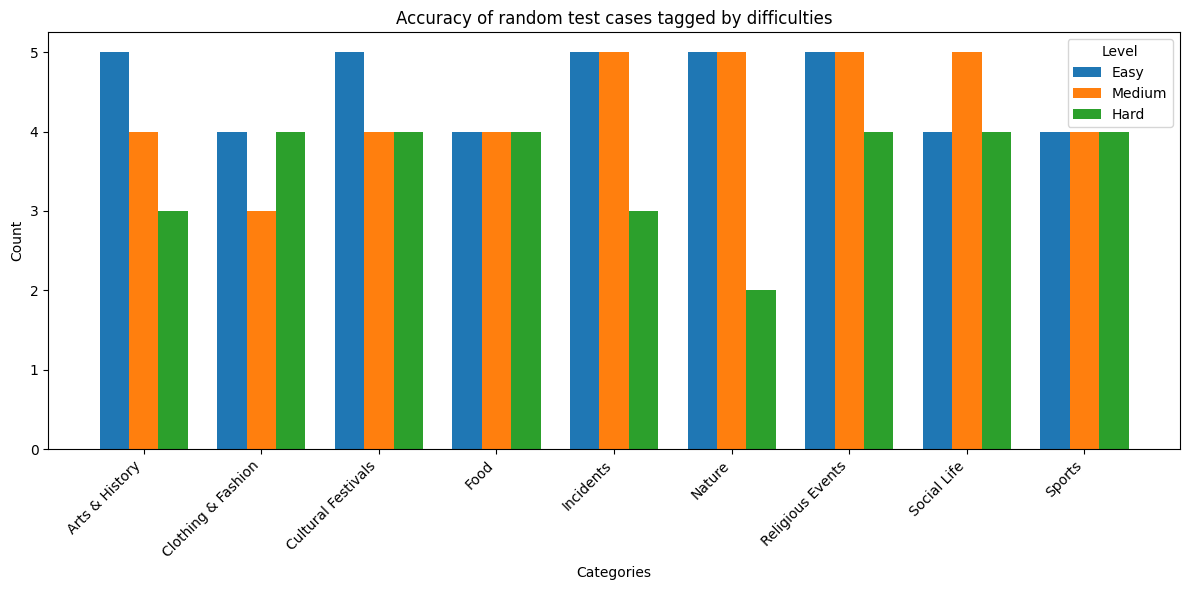

In [113]:
hard_easy_df['score'] = hard_easy_df['score'].astype(int)

# Group by category and level (easy, medium, hard)
grouped = hard_easy_df.groupby(['category', 'level'])['score'].sum().unstack(fill_value=0)

desired_order = ['Easy', 'Medium', 'Hard']
grouped = grouped[desired_order]
# Set up bar positions
categories = grouped.index  # Get category names
levels = grouped.columns  # Get level names ('easy', 'medium', 'hard')

x = np.arange(len(categories))  # Positions for the categories
width = 0.25  # Width of each bar

fig, ax = plt.subplots(figsize=(12, 6))

# Create bars for each level (side-by-side)
for i, level in enumerate(levels):
    ax.bar(x + i * width, grouped[level], width, label=level)

# Formatting the plot
ax.set_xlabel("Categories")
ax.set_ylabel("Count")
ax.set_title("Accuracy of random test cases tagged by difficulties")
ax.set_xticks(x + width)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend(title="Level")

plt.tight_layout()
plt.show()

In [99]:
# hard_easy_df.to_csv("outputs/level_tagged.csv")

### WH question

In [5]:
wh_list = ['কি','কত', 'কোন', 'কোথায়', 'কে', 'কার', 'কখন', 'কয়', 'কিভাবে', 'কবে']

def find_keywords(question):
    return [word for word in wh_list if word in question]


llava_df['matched_keywords'] = llava_df['question'].astype(str).apply(find_keywords)

In [11]:
llava_df[['question', 'matched_keywords', 'score']].head(5)

,question,matched_keywords,score
0,চিত্রের শিশুটি কোন ধরনের শিক্ষা গ্রহণ করছে?,[কোন],1
1,বাংলার মর্মান্তিক ইতিহাস বহনকারী এই স্তম্ভটির ...,"[কি, কার]",1
2,ছবিতে দেখা মুদ্রাটি কোন দেশের?,[কোন],1
3,ছবিতে মেয়েটি মাইক্রোফোনটি হাতে ধরে কী করছে?,[],1
4,প্রাচীনকালে বাংলায় এমন বড় আকৃতির মাটির পাত্র ক...,[কি],0


In [12]:
keyword_correct = {}  # Correct occurrences (score=1)
keyword_total = {}  # Total occurrences

# Count occurrences for each keyword
for keywords, score in zip(llava_df["matched_keywords"], llava_df["score"]):
    for keyword in keywords:
        # Increment total count
        keyword_total[keyword] = keyword_total.get(keyword, 0) + 1
        # Increment correct count if score is 1
        if score == 1:
            keyword_correct[keyword] = keyword_correct.get(keyword, 0) + 1

# Compute accuracy percentage for each keyword
keyword_accuracy = {
    k: (keyword_correct.get(k, 0) / keyword_total[k]) * 100 for k in keyword_total
}

# Convert to DataFrame
keyword_accuracy_df = pd.DataFrame(
    keyword_accuracy.items(), columns=["Keyword", "Accuracy (%)"]
)

keyword_accuracy_df = keyword_accuracy_df.sort_values(by="Accuracy (%)", ascending=False)


In [16]:
# keyword_total['কিভাবে']
keyword_accuracy_df.head(10)

,Keyword,Accuracy (%)
0,কোন,81.300813
1,কি,79.781421
2,কার,76.000000
3,কে,78.260870
4,কোথায়,78.947368
5,কত,90.909091
6,কখন,100.000000
7,কিভাবে,0.000000
8,কয়,50.000000


/tmp/ipykernel_12224/2169807051.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword_accuracy_df["Keyword"], y=keyword_accuracy_df["Accuracy (%)"], palette="coolwarm")
/home/sourove/.cache/pypoetry/virtualenvs/vqa-next-eInyQkxN-py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sourove/.cache/pypoetry/virtualenvs/vqa-next-eInyQkxN-py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sourove/.cache/pypoetry/virtualenvs/vqa-next-eInyQkxN-py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 2507 (\N{BENGALI VOWEL SIGN O}) mi

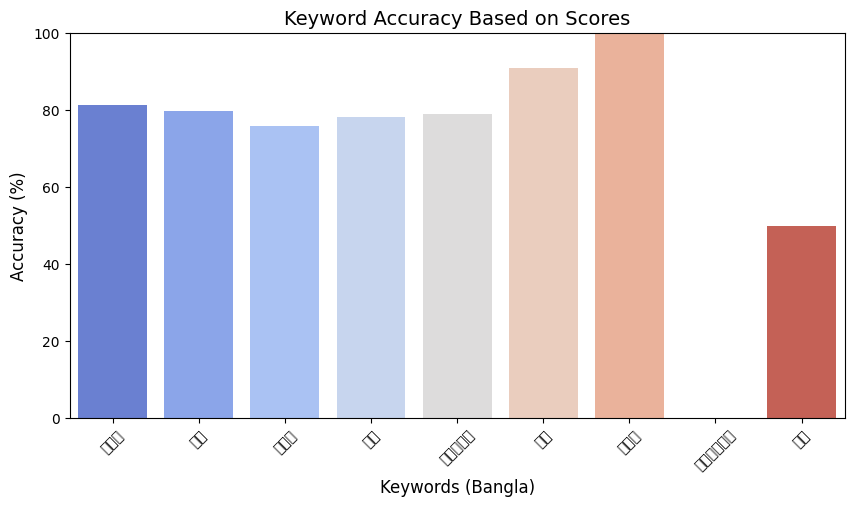

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=keyword_accuracy_df["Keyword"], y=keyword_accuracy_df["Accuracy (%)"], palette="coolwarm")

plt.xlabel("Keywords (Bangla)", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Keyword Accuracy Based on Scores", fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 100)

# Show plot
plt.show()